## Exploratory data analysis

### Dataset: Credit Score Classification

#### source: kaggle.com

In [1]:
import re
import os

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('.\credit_score_train.csv')

C:\Users\olaja\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

1. **Types of data, missing values and statistics**

The dataset consists of 100000 rows and 28 columns. Some colums should be a type 'category' and some 'float64' not 'object'.

In [3]:
df[['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']] = df[['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  object  
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  object  
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  object  
 13  Type_of_Loan              8859

In [7]:
print(df)

            ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12

In [4]:
df['Age'] = df['Age'].str.replace(r'\D', '').astype(float)
df['Annual_Income'] = df['Annual_Income'].str.replace(r'\D', '').astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace(r'\D', '').astype(float)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace(r'\D', '').astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace(r'\D', '').astype(float)
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'\D', '').astype(float)

<ipython-input-4-87c349bfca73>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Age'] = df['Age'].str.replace(r'\D', '').astype(float)
<ipython-input-4-87c349bfca73>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Annual_Income'] = df['Annual_Income'].str.replace(r'\D', '').astype(float)
<ipython-input-4-87c349bfca73>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Num_of_Loan'] = df['Num_of_Loan'].str.replace(r'\D', '').astype(float)
<ipython-input-4-87c349bfca73>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace(r'\D', '').astype(float)
<ipython-input-4-87c349bfca73>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Amount_invested_monthly'] = df['Amou

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  float64 
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  float64 
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  float64 
 13  Type_of_Loan              8859

Now I will check null values in all columns.

In [5]:
nulls_sum = pd.DataFrame(df.isnull().any(), columns=['Nulls'])
nulls_sum['Num_of_nulls [qty]'] = pd.DataFrame(df.isnull().sum())
nulls_sum['Num_of_nulls [%]'] = round((df.isnull().mean()*100),2)
nulls_sum.sort_values(by=['Num_of_nulls [qty]'], ascending=False)

,Nulls,Num_of_nulls [qty],Num_of_nulls [%]
Monthly_Inhand_Salary,True,15002,15.00
Type_of_Loan,True,11408,11.41
Name,True,9985,9.98
Credit_History_Age,True,9030,9.03
Num_of_Delayed_Payment,True,7002,7.00
Amount_invested_monthly,True,4479,4.48
Monthly_Balance,True,2868,2.87
Num_Credit_Inquiries,True,1965,1.96
ID,False,0,0.00
Changed_Credit_Limit,False,0,0.00


The most missing data - 15% are in the column 'Monthly_Inhand_Salary'. Location of missing values will show us if there are any accumulation.

<AxesSubplot:>

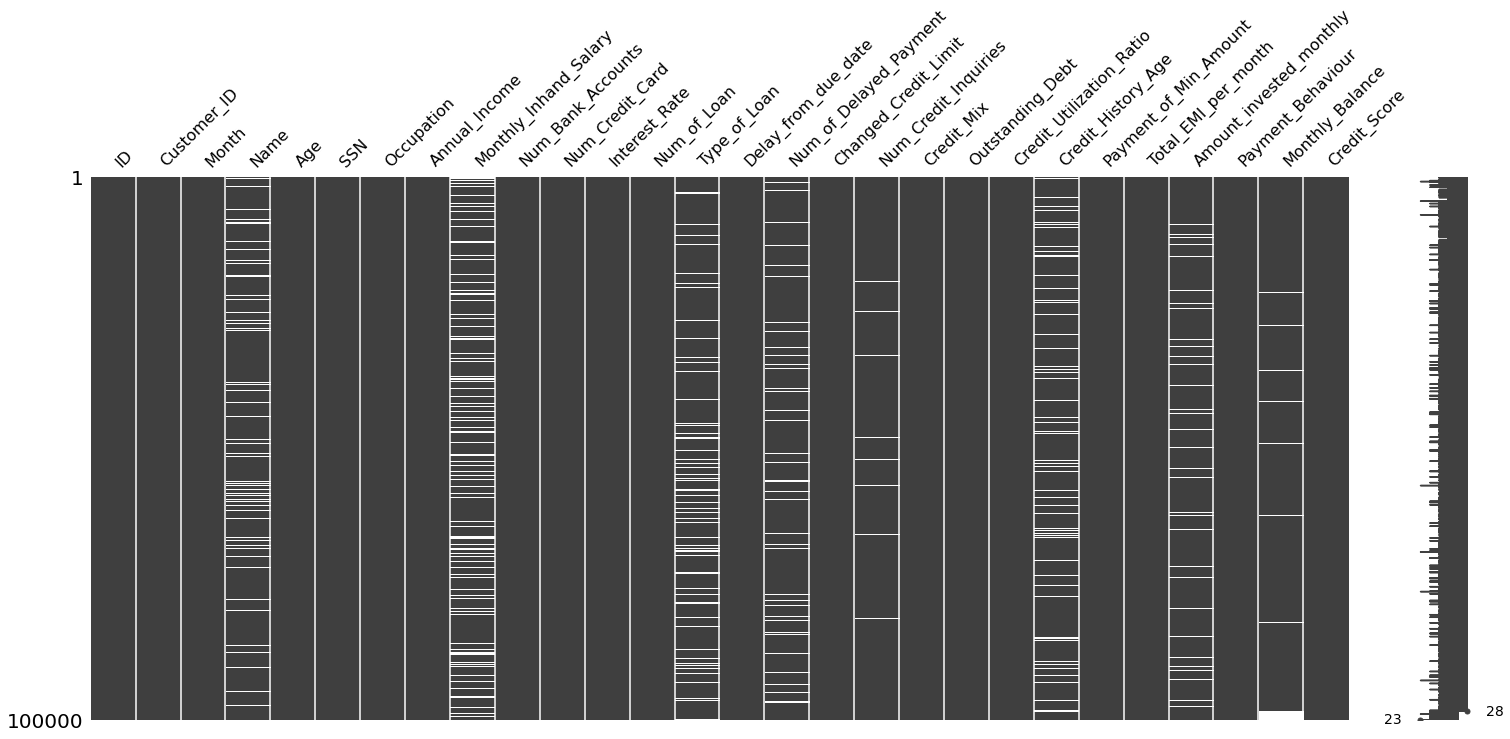

In [11]:
msno.matrix(df)

Missing data are not accumulated in one place, but scattered.

In [12]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,98035.000000,100000.000000,100000.000000,9.552100e+04,9.713200e+04
mean,119.509700,1.601957e+14,4194.170850,17.091280,22.47443,72.466040,10.761960,21.068780,30.946268,27.754251,32.285173,1403.118217,1.204896e+16,3.088582e+22
std,684.757313,1.151113e+15,3183.686167,117.404834,129.05741,466.422621,61.789933,14.860104,226.028754,193.177339,5.116875,8306.041270,1.254815e+16,3.208492e+24
min,14.000000,7.046500e+04,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,0.000000,0.000000,20.000000,0.000000,0.000000e+00,3.422493e+10
25%,25.000000,1.826411e+06,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,3.000000,28.052567,30.306660,3.260233e+15,3.265617e+15
50%,34.000000,3.836154e+06,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,6.000000,32.305784,69.249473,8.162033e+15,6.623487e+15
75%,42.000000,8.312624e+06,5957.448333,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,9.000000,36.496663,161.224249,1.592943e+16,2.659909e+16
max,8698.000000,1.349284e+16,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,2597.000000,50.000000,82331.000000,6.399602e+16,3.333333e+26


2. **Feature analysis**

* Monthly_Inhand_Salary

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Count'>

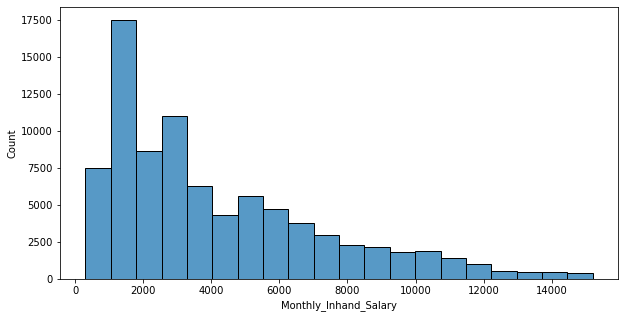

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Monthly_Inhand_Salary', bins=20, palette='hls')

In [14]:
print(df['Credit_Score'].values)

['Good', 'Good', 'Good', 'Good', 'Good', ..., 'Poor', 'Poor', 'Poor', 'Standard', 'Poor']
Length: 100000
Categories (3, object): ['Good', 'Poor', 'Standard']


In [15]:
print(df['Monthly_Inhand_Salary'].values)
isnull.df['Monthly_Inhand_Salary']

[1824.84333333           nan           nan ... 3359.41583333 3359.41583333
 3359.41583333]


NameError: name 'isnull' is not defined

Dependence of the monthly inhand salary and credit score

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Count'>

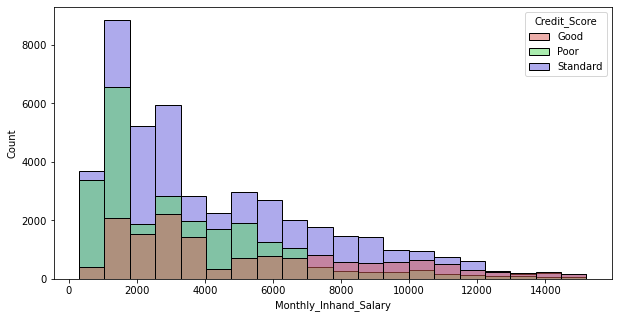

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Monthly_Inhand_Salary", hue= 'Credit_Score', bins=20, palette='hls')

* Occupation

<AxesSubplot:xlabel='count', ylabel='Occupation'>

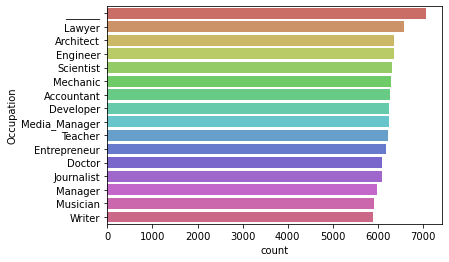

In [17]:
sns.countplot(data=df, y='Occupation', order=df['Occupation'].value_counts().index, palette='hls')

Most of the values in the 'Occupation' column are missing values, next common professions are: lawyer, architect, engineer.

C:\Users\olaja\anaconda\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


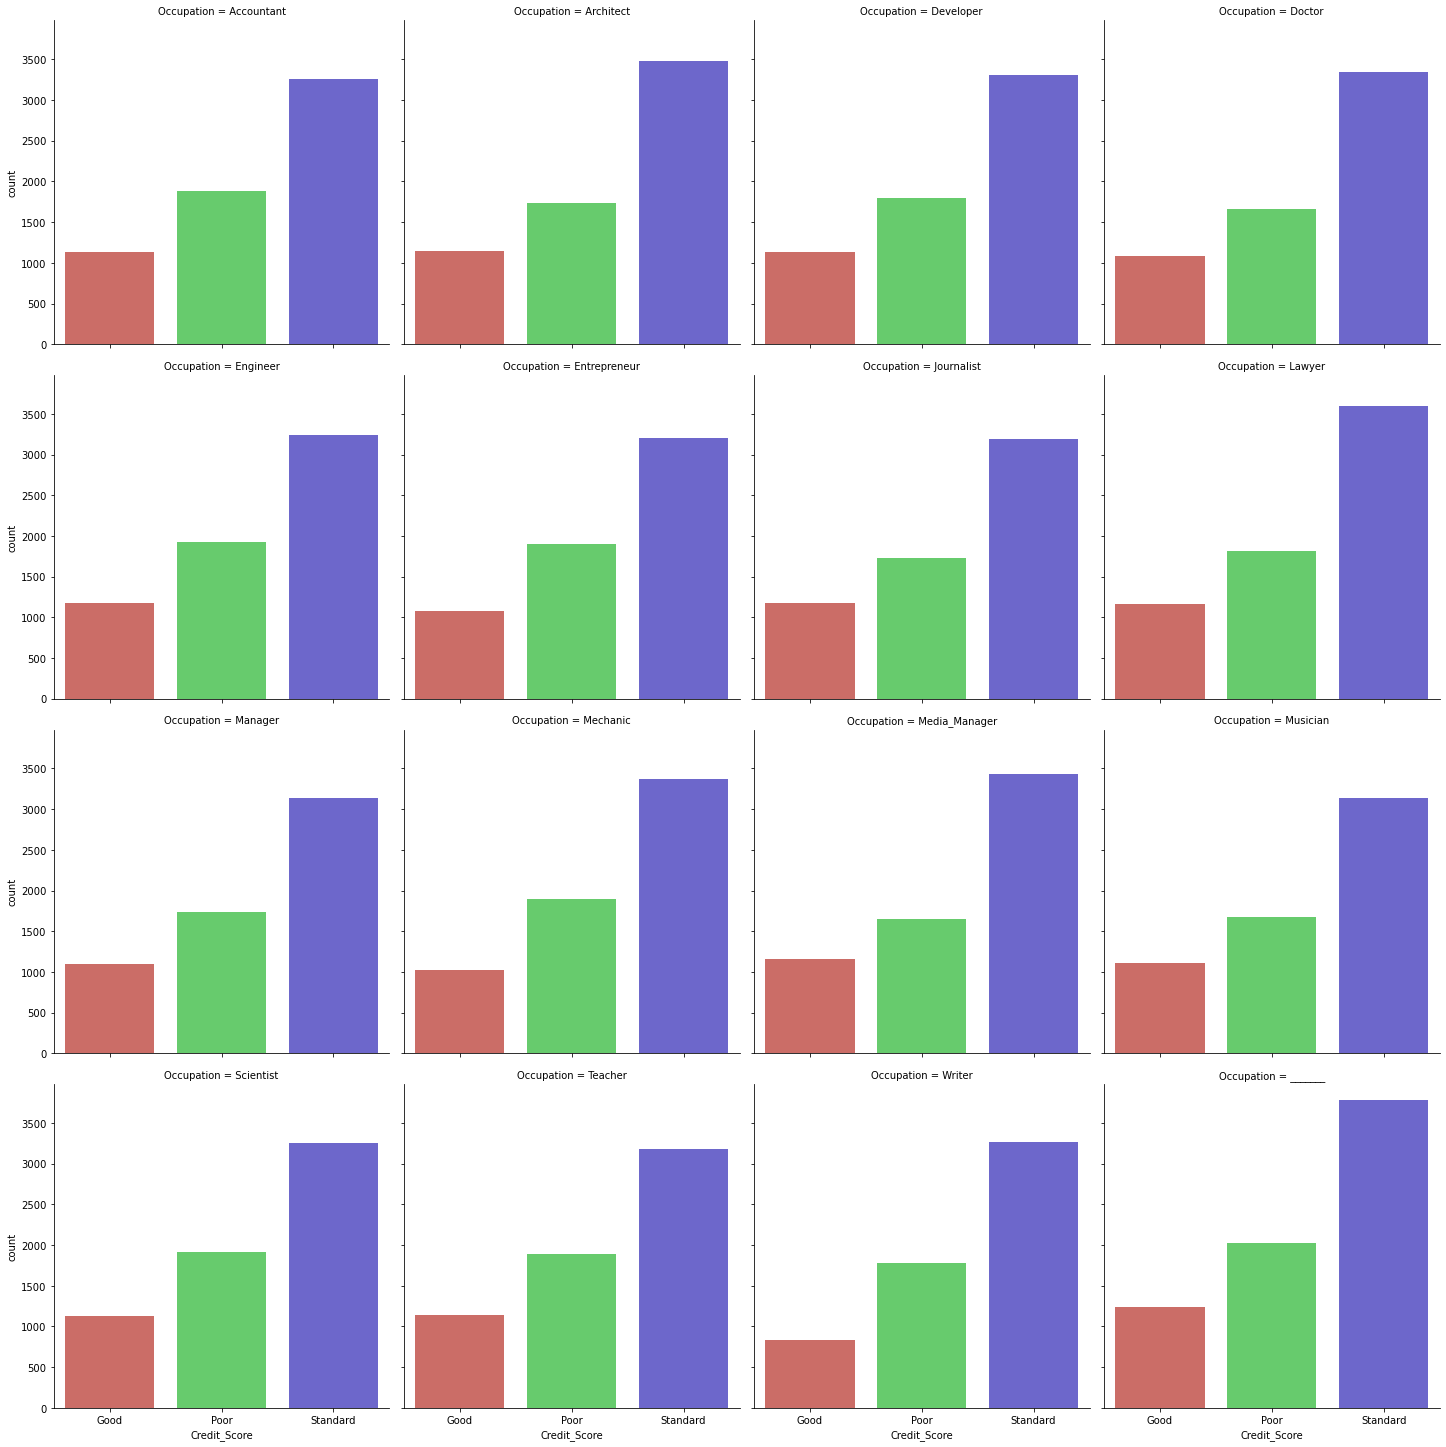

In [18]:
sns.factorplot(data=df, x='Credit_Score', col='Occupation', kind='count', col_wrap = 4, palette='hls')

Standard is the most common scoring for all professions

* Type_of_loan

In [19]:
df['Type_of_Loan'].value_counts()

Not Specified                                                                                                        1408
Credit-Builder Loan                                                                                                  1280
Personal Loan                                                                                                        1272
Debt Consolidation Loan                                                                                              1264
Student Loan                                                                                                         1240
                                                                                                                     ... 
Home Equity Loan, Debt Consolidation Loan, Credit-Builder Loan, and Home Equity Loan                                    8
Home Equity Loan, Debt Consolidation Loan, Credit-Builder Loan, and Credit-Builder Loan                                 8
Home Equity Loan, Debt C

In [6]:
nulls_loan = ~df['Type_of_Loan'].isnull().values
loan_list = list(df['Type_of_Loan'][nulls_loan])
loan_list

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan,

In [7]:
loan_dict = dict()
for i in loan_list:
    i = i.split(',')
    for each in i:
        loan_type = each.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_dict:
            loan_dict[loan_type] += 1
        else:
            loan_dict[loan_type] = 1

loan_dict

{'Auto Loan': 37992,
 'Credit-Builder Loan': 40440,
 'Personal Loan': 38888,
 'Home Equity Loan': 39104,
 'Not Specified': 39616,
 'Mortgage Loan': 38936,
 'Student Loan': 38968,
 'Debt Consolidation Loan': 38776,
 'Payday Loan': 40568}

All of types of loan have a similar popular among borrowers. 'Credit-Builder Loan' and 'Payday Loan' are a bit more common.

* Credit_Mix

In [22]:
df['Credit_Mix'].value_counts(dropna = False)

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

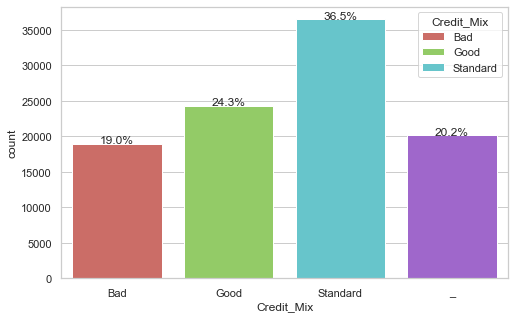

In [63]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(data=df, x="Credit_Mix", hue="Credit_Mix", palette='hls', dodge=False)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

The most (36,5%) of the clients have o 'Standard' credit mix.

Credit score vs credit mix

C:\Users\olaja\anaconda\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


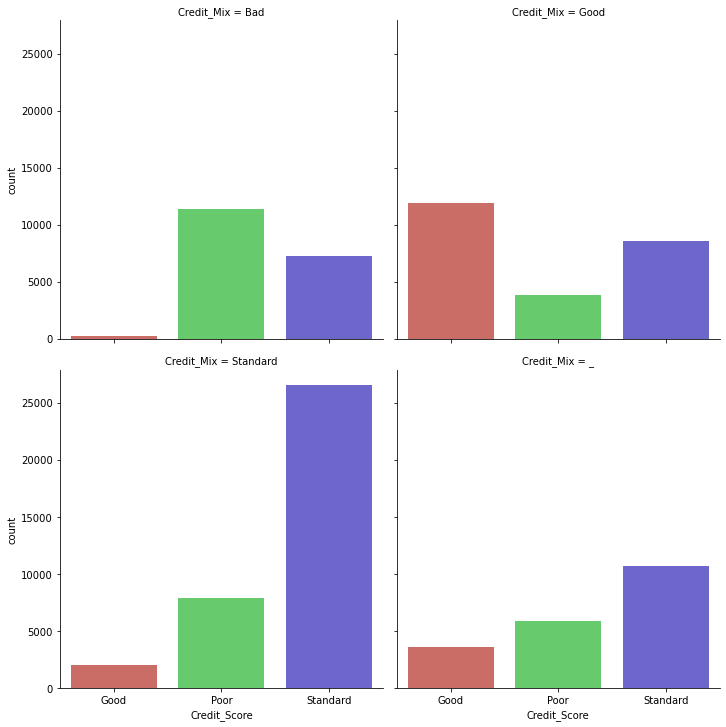

In [8]:
sns.factorplot(data=df, x='Credit_Score', col='Credit_Mix', kind='count', col_wrap = 2, palette='hls')

'Credit_Score' and 'Credit_Mix' ase similar.

* Age

In [70]:
df['Age'].values

array([ 23.,  23., 500., ...,  25.,  25.,  25.])

In [66]:
df['Age'].describe()

count    100000.000000
mean        119.509700
std         684.757313
min          14.000000
25%          25.000000
50%          34.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

<AxesSubplot:title={'center':'Customers Age Distribution'}, ylabel='Density'>

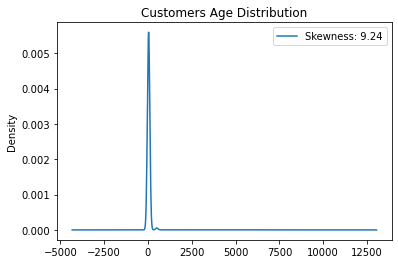

In [58]:
df['Age'].plot.kde(label = 'Skewness: %.2f'%(df['Age'].skew()), legend='best', title='Customers Age Distribution')

Age has a high degree of skewness.

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

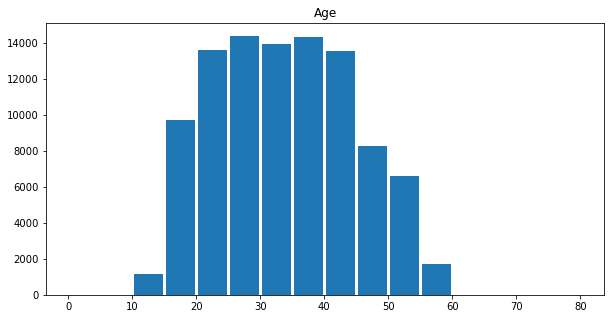

In [66]:
df.hist(column='Age', bins=[0,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80],grid=False, figsize=(10,5), zorder=2, rwidth=0.9)

* Interset_Rate

<AxesSubplot:title={'center':'Customers Interest Rate Distribution'}, ylabel='Density'>

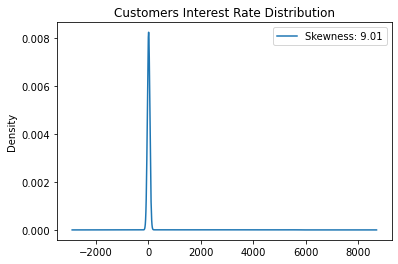

In [53]:
df['Interest_Rate'].plot.kde(label = 'Skewness: %.2f'%(df['Interest_Rate'].skew()), legend='best', title='Customers Interest Rate Distribution')

Interest_Rate has a high degree of skewness.